### Import library and model

In [1]:
# Import library and model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import auto_arima

### Import Dataset

In [2]:
# Import Dataset
 # EUR - VND
eur = pd.read_csv('..\Dataset\EUR.csv')
 # GBP - VND
gbp = pd.read_csv("..\Dataset\GBP.csv")
 # JPY - VND
jpy = pd.read_csv("..\Dataset\JPY.csv")
# Give 'Sale' column
eur = eur['Sale'].replace({',':''}, regex=True).astype(float)
gbp = gbp['Sale'].replace({',':''}, regex=True).astype(float)
jpy = jpy['Sale'].replace({',':''}, regex=True).astype(float)

### Split train, test data

In [3]:
#### EUR - VND
  # case 1. 7:3
train_eur_1 = eur[:int(0.7*len(eur))]
test_eur_1 = eur[int(0.7*len(eur)):]
  # case 2. 8:2
train_eur_2 = eur[:int(0.8*len(eur))]
test_eur_2 = eur[int(0.8*len(eur)):]
  # case 3. 9:1
train_eur_3 = eur[:int(0.9*len(eur))]
test_eur_3 = eur[int(0.9*len(eur)):]

#### GBP - VND
  # case 1. 7:3
train_gbp_1 = gbp[:int(0.7*len(gbp))]
test_gbp_1 = gbp[int(0.7*len(gbp)):]
  # case 2. 8:2
train_gbp_2 = gbp[:int(0.8*len(gbp))]
test_gbp_2 = gbp[int(0.8*len(gbp)):]
  # case 3. 9:1
train_gbp_3 = gbp[:int(0.9*len(gbp))]
test_gbp_3 = gbp[int(0.9*len(gbp)):]

#### JPY - VND
  # case 1. 7:3
train_jpy_1 = jpy[:int(0.7*len(jpy))]
test_jpy_1 = jpy[int(0.7*len(jpy)):]
  # case 2. 8:2
train_jpy_2 = jpy[:int(0.8*len(jpy))]
test_jpy_2 = jpy[int(0.8*len(jpy)):]
  # case 3. 9:1
train_jpy_3 = jpy[:int(0.9*len(jpy))]
test_jpy_3 = jpy[int(0.9*len(jpy)):]

### Function to find the optimal ARIMA model

In [4]:
# Function to find optimal ARIMA model
def select_arima_model(data):
    model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
    print(model.summary())
    return model

### Function to predict test and forcast 30, 60, 90 days

In [5]:
def forecast_days(model,pre_test):    
    # Forecast 30 days next
    model1 = model.fit(pre_test)
    forecast30 = model1.predict(n_periods = 30)
    
    # Forecast 60 days next
    model2 = model.fit(forecast30)
    forecast60 = model2.predict(n_periods = 30)
    
    # Forecast 90 days next
    model3 = model.fit(forecast60)
    forecast90 = model3.predict(n_periods = 30)
    
    return forecast30, forecast60, forecast90

In [6]:
def predict_data_ARIMA(model, test):
    # Predict test data
    pre_test = model.predict(n_periods = len(test))
    # Forecast 30, 60, 90 days next
    f3, f6, f9 = forecast_days(model, pre_test)
    
    return pre_test, f3, f6, f9

### Function to visualizate the model

In [7]:
def visualise_ARIMA_model(model, train, test, pre_test, f3, f6, f9):
    # set train, test index
    index = pd.date_range(start='3/1/2019', end='6/1/2024', freq='d')
    # set forecast index
    forecast_index = pd.date_range(start='6/2/2024', periods=90, freq='d')
    
    plt.figure(figsize=(12, 6))
    plt.plot(index[:len(train)],train, label='Training Data')
    plt.plot(index[len(train):], test, label='Actual Test Data')
    plt.plot(index[len(train):], pre_test, label='Predictions Test Data')
    plt.plot(forecast_index[:30], f3, label='Forecast 30 days next')
    plt.plot(forecast_index[30:60], f6, label='Forecast 60 days next')
    plt.plot(forecast_index[60:], f9, label='Forecast 90 days next')
    plt.title('ARIMA Time Series Forecast')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate (VND)')
    plt.legend()
    plt.show()

### Function to evaluate the model

In [18]:
def evaluate_model(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    print('RMSE =',rmse)
    print('MAPE(%) =',mape)
    print('MAE =',mae)

# EUR - VND

- **Case 1. 7:3**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16229.940, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16229.035, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16229.988, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16229.972, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16227.261, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.358 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1344
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8112.631
Date:                Mon, 03 Jun 2024   AIC                          16227.261
Time:                        16:20:47   BIC                          16232.464
Sample:                             0   HQIC                         16229.210
                               - 1344                                  

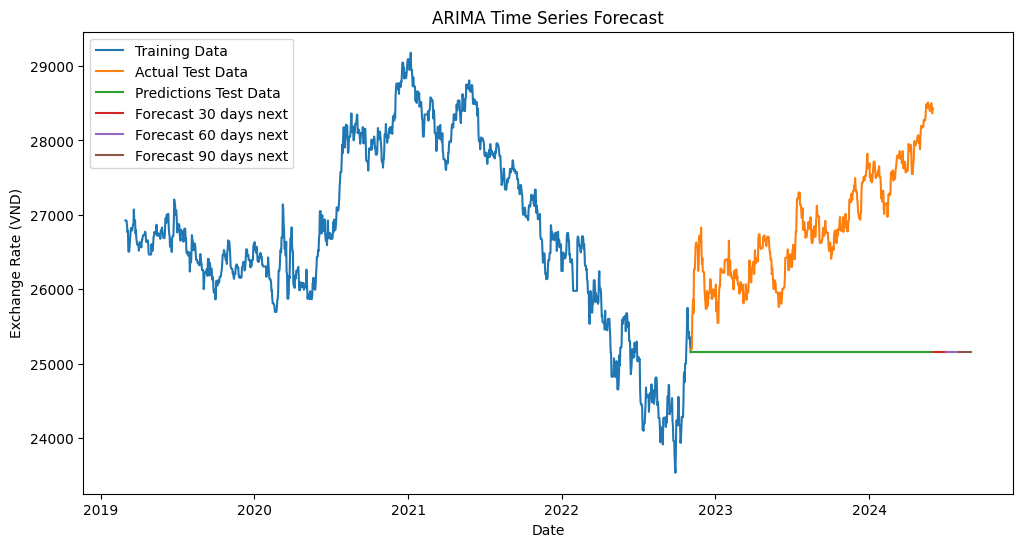

- Value on test data:
RMSE = 1830.8754319238167
MAPE(%) = 6.223814790233533
MAE = 1687.9444444444443


In [19]:
# Select model
model_eur_1 = select_arima_model(train_eur_1)
# Fit model
model_eur_1_rs = model_eur_1.fit(train_eur_1)
# Dự đoán và dự báo
predict_test_eur_1, forecast_eur1_30, forecast_eur1_60, forecast_eur1_90 = predict_data_ARIMA(model_eur_1_rs, test_eur_1)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_eur_1_rs,train_eur_1,test_eur_1,predict_test_eur_1, forecast_eur1_30, forecast_eur1_60, forecast_eur1_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_eur_1, test_eur_1)

- **Case 2. 8:2**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18630.839, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18626.840, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18628.837, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18628.840, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18624.857, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.241 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1536
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9311.429
Date:                Mon, 03 Jun 2024   AIC                          18624.857
Time:                        16:20:48   BIC                          18630.193
Sample:                             0   HQIC                         18626.843
                               - 1536                                  

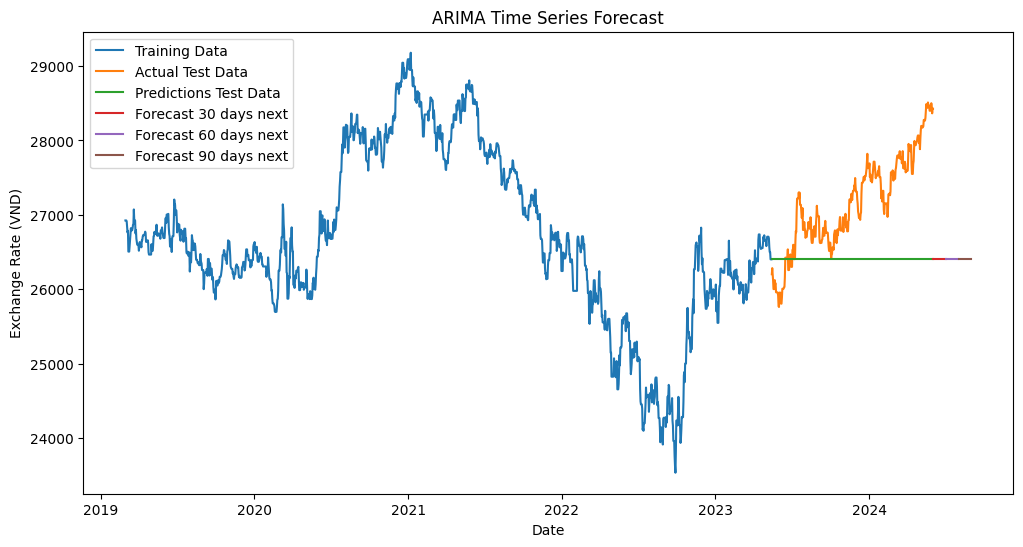

- Value on test data:
RMSE = 987.5119131665366
MAPE(%) = 2.9982268167628936
MAE = 825.4921875


In [20]:
# Select model
model_eur_2 = select_arima_model(train_eur_2)
# Fit model
model_eur_2_rs = model_eur_2.fit(train_eur_2)
# Dự đoán và dự báo
predict_test_eur_2, forecast_eur2_30, forecast_eur2_60, forecast_eur2_90 = predict_data_ARIMA(model_eur_2_rs, test_eur_2)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_eur_2_rs,train_eur_2,test_eur_2,predict_test_eur_2,forecast_eur2_30, forecast_eur2_60, forecast_eur2_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_eur_2, test_eur_2)

- **Case 3. 9:1**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20922.709, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20918.707, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20920.706, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20920.709, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20916.711, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.220 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1728
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -10457.356
Date:                Mon, 03 Jun 2024   AIC                          20916.711
Time:                        16:20:48   BIC                          20922.165
Sample:                             0   HQIC                         20918.729
                               - 1728                                  

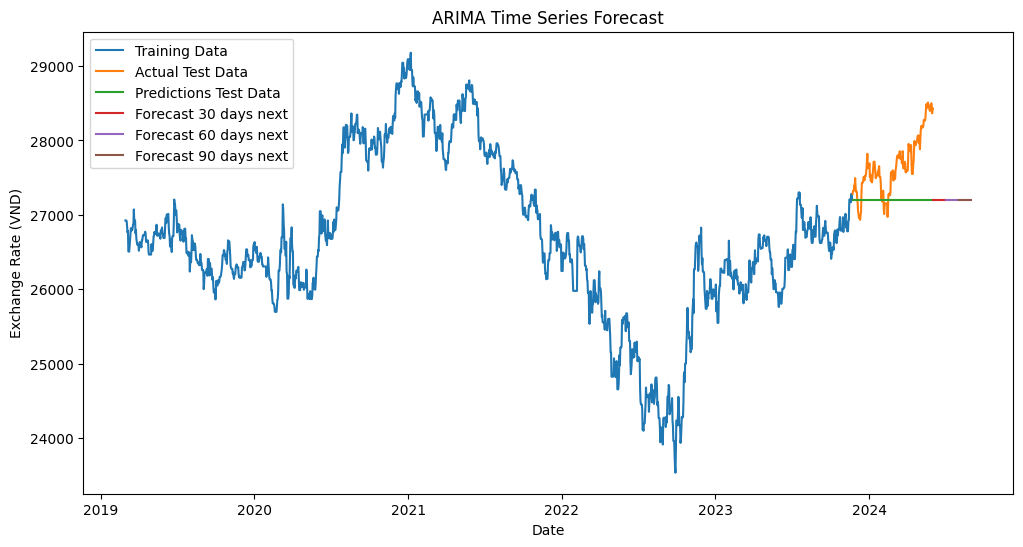

- Value on test data:
RMSE = 610.0093749279596
MAPE(%) = 1.7891605740120855
MAE = 499.6875


In [21]:
# Select model
model_eur_3 = select_arima_model(train_eur_3)
# Fit model
model_eur_3_rs = model_eur_3.fit(train_eur_3)
# Dự đoán và dự báo
predict_test_eur_3, forecast_eur3_30, forecast_eur3_60, forecast_eur3_90 = predict_data_ARIMA(model_eur_3_rs,   test_eur_3)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_eur_3_rs,train_eur_3,test_eur_3,predict_test_eur_3,forecast_eur3_30, forecast_eur3_60, forecast_eur3_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_eur_3, test_eur_3)

# GBP - VND

- **Case 1. 7:3**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17225.259, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17222.130, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17223.945, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17223.968, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17220.297, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.377 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1344
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8609.148
Date:                Mon, 03 Jun 2024   AIC                          17220.297
Time:                        16:20:49   BIC                          17225.500
Sample:                             0   HQIC                         17222.246
                               - 1344                                  

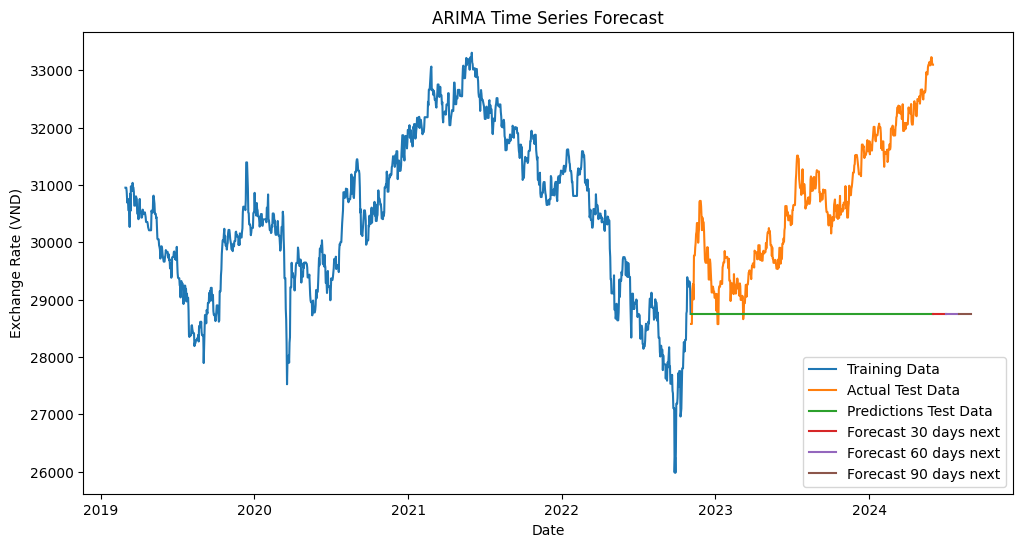

- Value on test data:
RMSE = 2266.597204818026
MAPE(%) = 6.3037626144932055
MAE = 1974.25


In [22]:
# Select model
model_gbp_1 = select_arima_model(train_gbp_1)
# Fit model
model_gbp_1_rs = model_gbp_1.fit(train_gbp_1)
# Dự đoán và dự báo
predict_test_gbp_1, forecast_gbp1_30, forecast_gbp1_60, forecast_gbp1_90 = predict_data_ARIMA(model_gbp_1_rs,   test_gbp_1)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_gbp_1_rs,train_gbp_1,test_gbp_1,predict_test_gbp_1,forecast_gbp1_30, forecast_gbp1_60, forecast_gbp1_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_gbp_1, test_gbp_1)

- **Case 2. 8:2**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19708.095, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19705.460, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19706.966, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19707.013, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19703.490, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.359 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1536
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9850.745
Date:                Mon, 03 Jun 2024   AIC                          19703.490
Time:                        16:20:50   BIC                          19708.826
Sample:                             0   HQIC                         19705.476
                               - 1536                                  

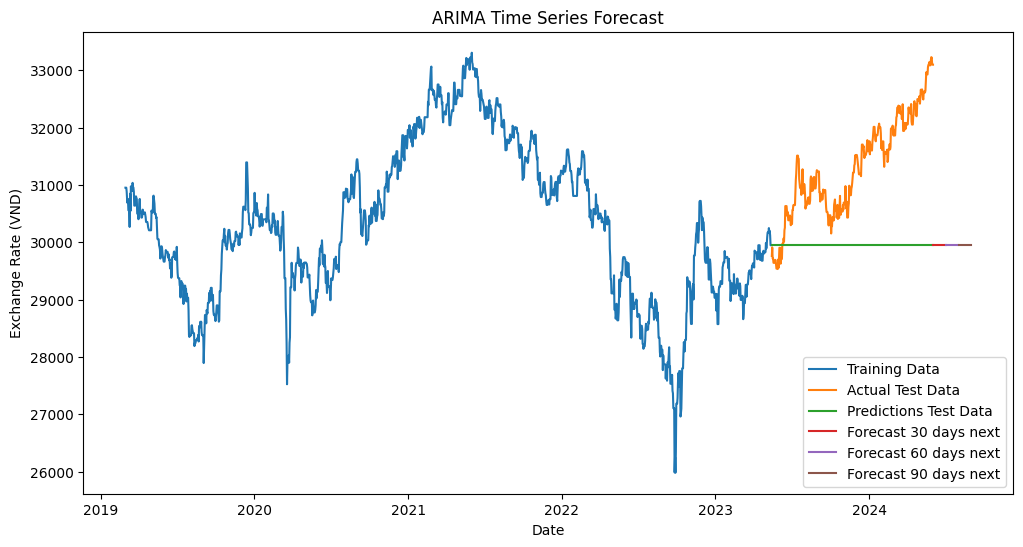

- Value on test data:
RMSE = 1610.1138401134872
MAPE(%) = 4.373432206634066
MAE = 1390.125


In [23]:
# Select model
model_gbp_2 = select_arima_model(train_gbp_2)
# Fit model
model_gbp_2_rs = model_gbp_2.fit(train_gbp_2)
# Dự đoán và dự báo
predict_test_gbp_2, forecast_gbp2_30, forecast_gbp2_60, forecast_gbp2_90 = predict_data_ARIMA(model_gbp_2_rs,   test_gbp_2)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_gbp_2_rs,train_gbp_2,test_gbp_2,predict_test_gbp_2,forecast_gbp2_30, forecast_gbp2_60, forecast_gbp2_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_gbp_2, test_gbp_2)

- **Case 3. 9:1**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22115.102, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22113.016, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22114.282, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22114.350, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22111.016, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.671 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1728
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11054.508
Date:                Mon, 03 Jun 2024   AIC                          22111.016
Time:                        16:20:51   BIC                          22116.470
Sample:                             0   HQIC                         22113.034
                               - 1728                                  

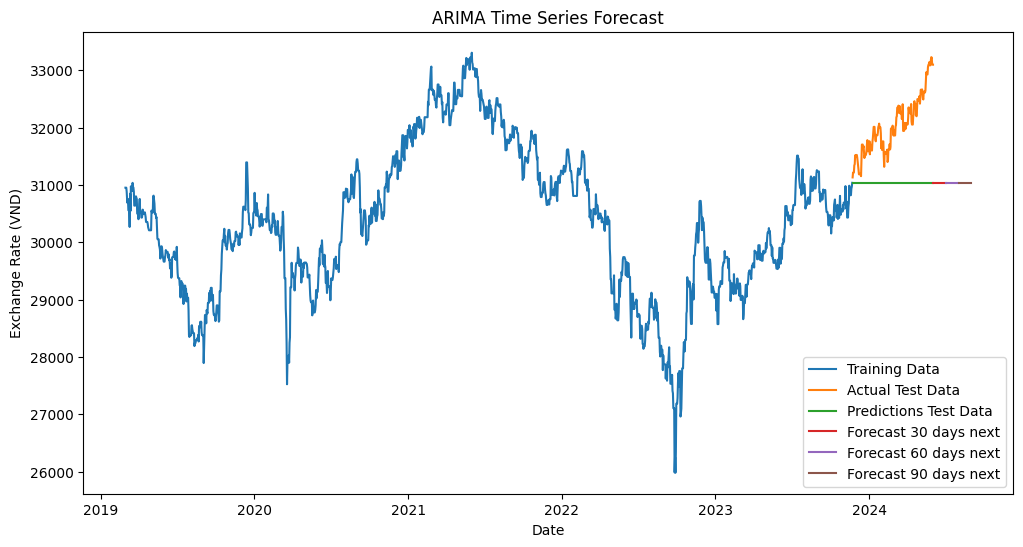

- Value on test data:
RMSE = 1112.536073853338
MAPE(%) = 3.0707601316283863
MAE = 991.1197916666666


In [24]:
# Select model
model_gbp_3 = select_arima_model(train_gbp_3)
# Fit model
model_gbp_3_rs = model_gbp_3.fit(train_gbp_3)
# Dự đoán và dự báo
predict_test_gbp_3, forecast_gbp3_30, forecast_gbp3_60, forecast_gbp3_90 = predict_data_ARIMA(model_gbp_3_rs, test_gbp_3)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_gbp_3_rs,train_gbp_3,test_gbp_3,predict_test_gbp_3,forecast_gbp3_30, forecast_gbp3_60, forecast_gbp3_90 )
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_gbp_3, test_gbp_3)

# JPY - VND

- **Case 1. 7:3**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3792.768, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3799.521, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3797.937, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3797.722, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3798.547, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3794.388, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3794.389, Time=0.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3798.732, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3798.781, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3796.400, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3793.050, Time=0.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.873 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1

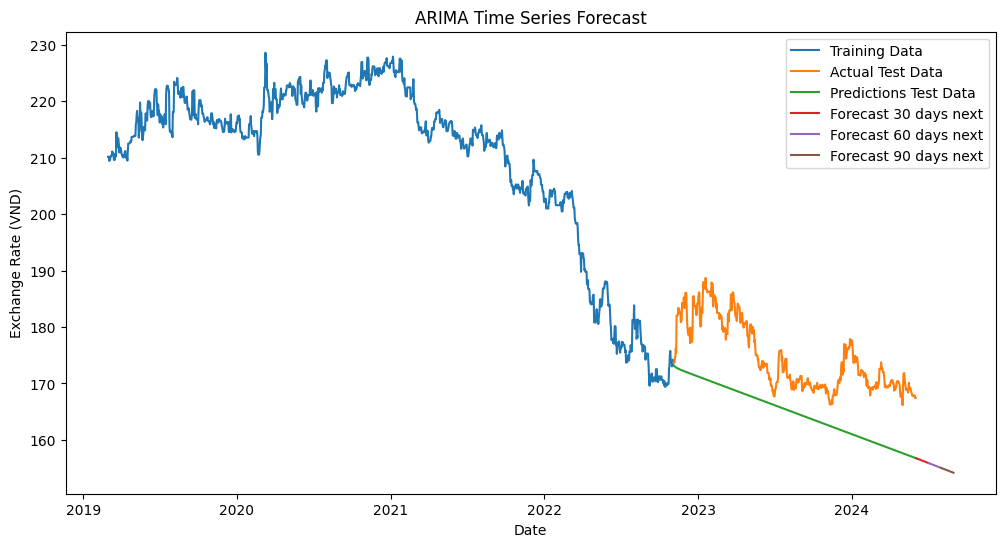

- Value on test data:
RMSE = 10.529356836393235
MAPE(%) = 5.591866008124461
MAE = 9.836293660527875


In [25]:
# Select model
model_jpy_1 = select_arima_model(train_jpy_1)
# Fit model
model_jpy_1_rs = model_jpy_1.fit(train_jpy_1)
# Dự đoán và dự báo
predict_test_jpy_1, forecast_jpy1_30, forecast_jpy1_60, forecast_jpy1_90 = predict_data_ARIMA(model_jpy_1_rs, test_jpy_1)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_jpy_1_rs,train_jpy_1,test_jpy_1,predict_test_jpy_1,forecast_jpy1_30, forecast_jpy1_60, forecast_jpy1_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_jpy_1, test_jpy_1)

- **Case 2. 8:2**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4462.475, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4469.563, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4469.034, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4468.899, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4468.136, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4464.418, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4464.419, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4469.939, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4470.001, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4466.155, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4461.707, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4467.525, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4467.656, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4463.656, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]          

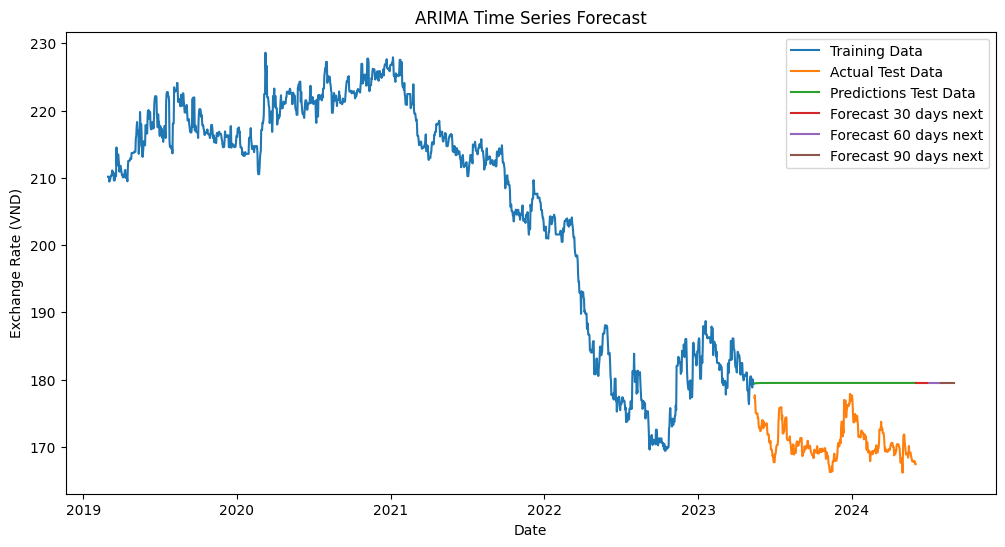

- Value on test data:
RMSE = 9.013736689163286
MAPE(%) = 5.088970891204565
MAE = 8.656099094227987


In [26]:
# Select model
model_jpy_2 = select_arima_model(train_jpy_2)
# Fit model
model_jpy_2_rs = model_jpy_2.fit(train_jpy_2)
# Dự đoán và dự báo
predict_test_jpy_2, forecast_jpy2_30, forecast_jpy2_60, forecast_jpy2_90 = predict_data_ARIMA(model_jpy_2_rs,  test_jpy_2)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_jpy_2_rs,train_jpy_2,test_jpy_2,predict_test_jpy_2,forecast_jpy2_30, forecast_jpy2_60, forecast_jpy2_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_jpy_2, test_jpy_2)

- **Case 3. 9:1**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4903.579, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4910.480, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4910.244, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4910.155, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4909.510, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4905.534, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4905.535, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4911.558, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4911.583, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4907.102, Time=1.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4903.747, Time=0.16 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.946 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1

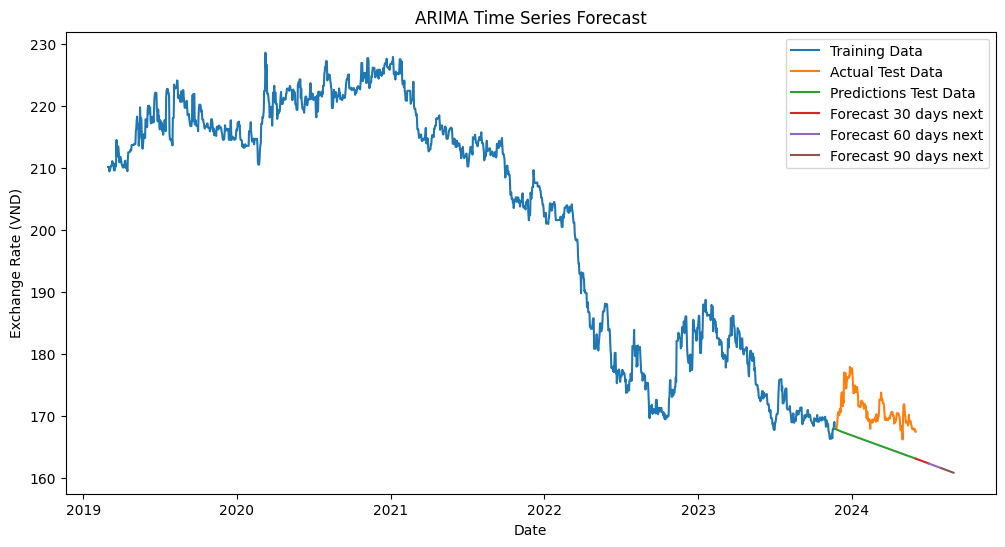

- Value on test data:
RMSE = 5.955268537077679
MAPE(%) = 3.239116502337816
MAE = 5.565161639054298


In [27]:
# Select model
model_jpy_3 = select_arima_model(train_jpy_3)
# Fit model
model_jpy_3_rs = model_jpy_3.fit(train_jpy_3)
# Dự đoán và dự báo
predict_test_jpy_3, forecast_jpy3_30, forecast_jpy3_60, forecast_jpy3_90 = predict_data_ARIMA(model_jpy_3_rs,   test_jpy_3)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_jpy_3_rs,train_jpy_3,test_jpy_3,predict_test_jpy_3,forecast_jpy3_30, forecast_jpy3_60, forecast_jpy3_90 )
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_jpy_3, test_jpy_3)